 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [192]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [193]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.describe()
whale_df.shape

(1060, 4)

In [194]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [195]:
# Drop nulls
# YOUR CODE HERE
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [196]:
#sp500_returns.columns = ["SP500"]
whale_df.columns = ["Soros", "Paulson", "Tiger", "Berk"]
whale_df

,Soros,Paulson,Tiger,Berk
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [197]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [198]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [199]:
# Drop nulls
# YOUR CODE HERE
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [200]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
#amd_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
sp500_df_closings = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df_closings

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [201]:
sp500_df_closings.isnull().sum()

Close    0
dtype: int64

In [202]:
sp500_df_closings = sp500_df_closings.dropna()

In [203]:
# Check Data Types
# YOUR CODE HERE
sp500_df_closings.dtypes

Close    object
dtype: object

In [204]:
# Fix Data Types
# YOUR CODE HERE
# sp500_df_closings['Date']= pd.to_datetime(sp500_df_closings['Date']) 
sp500_df_closings['Close'] = sp500_df_closings['Close'].str.replace('$', '')
sp500_df_closings['Close']= pd.to_numeric(sp500_df_closings['Close']) 
sp500_df_closings.sort_index(inplace=True)
sp500_df_closings

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [205]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_df_closings.pct_change()

In [206]:
# Drop nulls
# YOUR CODE HERE
sp500_returns = sp500_returns.dropna()
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [207]:
# Rename Column
# YOUR CODE HERE
# sp500_returns.set_axis(['returns'], axis='columns')
# sp500_returns.sort_index(inplace=True)
sp500_returns.columns = ["SP500"]

## Combine Whale, Algorithmic, and S&P 500 Returns

In [208]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
all_returns = pd.concat([whale_df, algo_df, sp500_returns], axis="columns", join="inner")
all_returns2 = pd.concat([whale_df, algo_df, sp500_returns], axis="columns", join="inner")
all_returns.sort_index(inplace=True)
all_returns2.sort_index(inplace=True)
all_returns.head(10)

,Soros,Paulson,Tiger,Berk,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

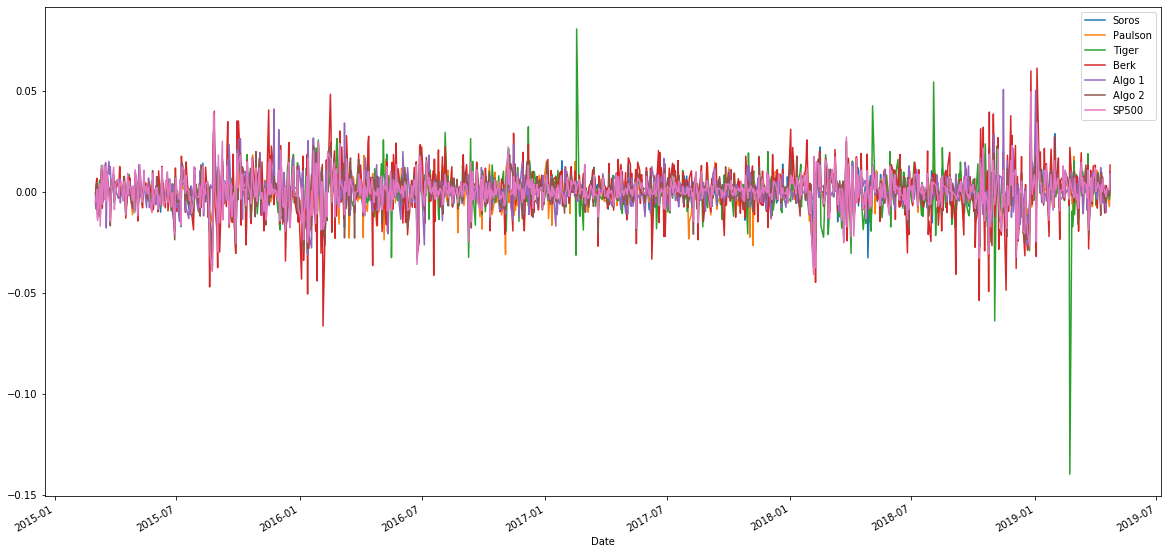

In [209]:
# Plot daily returns
# YOUR CODE HERE
all_returns.plot(kind="line", figsize=(20, 10))

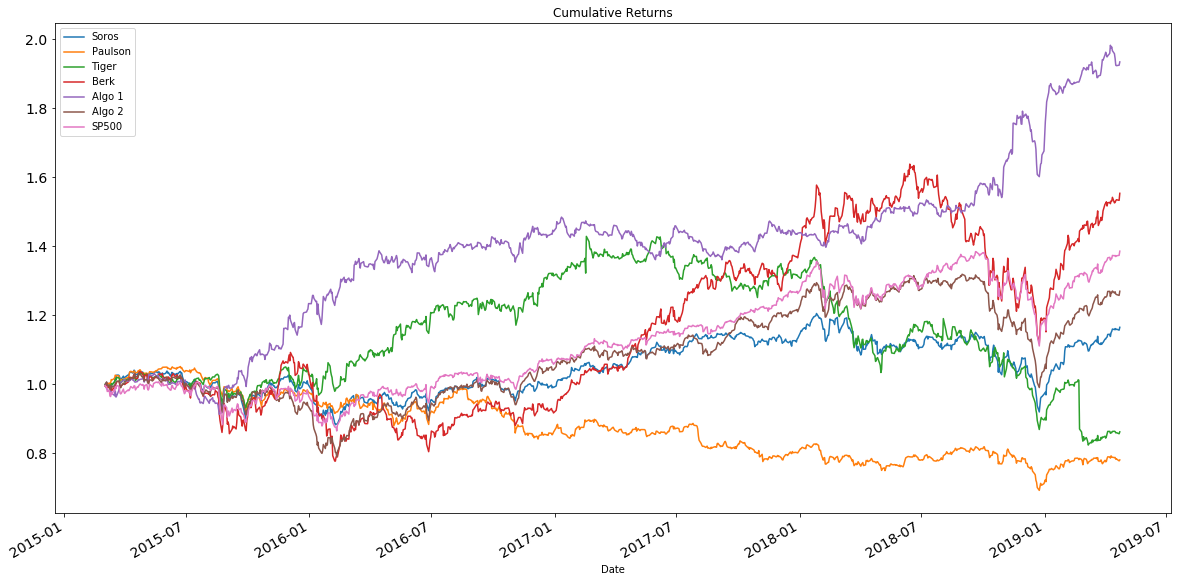

In [210]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + all_returns).cumprod()
cumulative_returns.plot(kind="line", title="Cumulative Returns", fontsize=14, figsize=(20, 10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

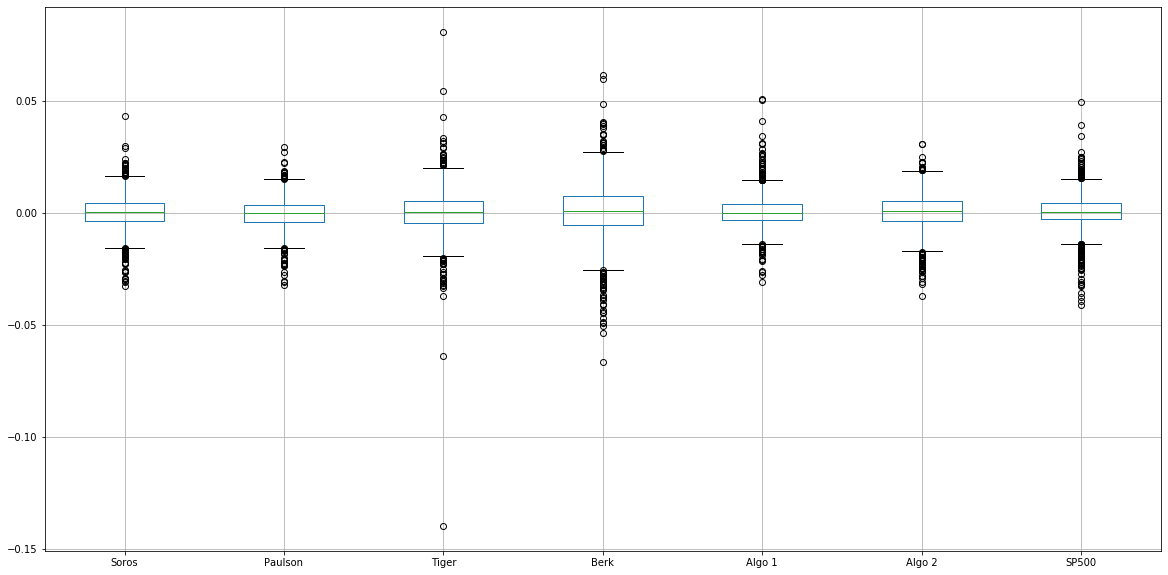

In [211]:
# Box plot to visually show risk
# YOUR CODE HERE
all_returns.boxplot(column=['Soros','Paulson','Tiger','Berk','Algo 1','Algo 2','SP500'], figsize=(20,10))

In [212]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
all_returns.std()

#The table below shows the Berkshire Portfolio with the highest standard deviation in daily returns

Soros      0.007895
Paulson    0.007023
Tiger      0.010894
Berk       0.012919
Algo 1     0.007620
Algo 2     0.008342
SP500      0.008554
dtype: float64

In [213]:
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
volatility = all_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility
#Both Tiger and Bershire Portfolios are riskier than the SP500 according to the table below
#List is sorted from least to most risky

Paulson    0.111488
Algo 1     0.120967
Soros      0.125335
Algo 2     0.132430
SP500      0.135786
Tiger      0.172936
Berk       0.205077
dtype: float64

In [214]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE


In [215]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

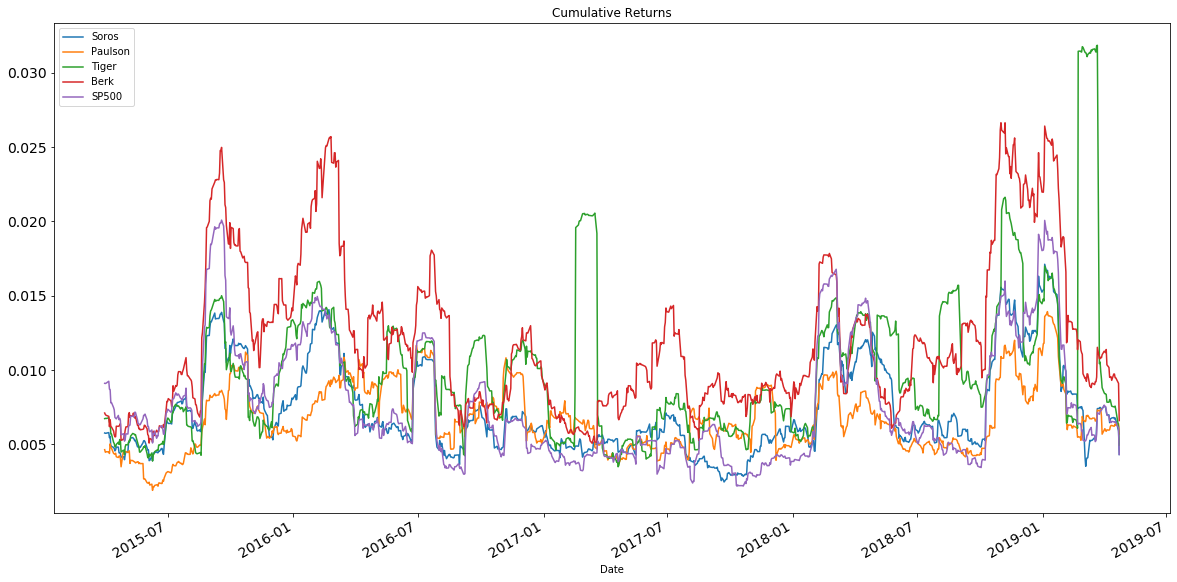

In [216]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
# people_df = people_df.drop(columns=["Age_Copy"])
# people_df.head()
no_algo_returns = all_returns.drop(columns=["Algo 1", "Algo 2"])
no_algo_returns.rolling(window=21).std().plot(kind="line", title="Cumulative Returns", fontsize=14, figsize=(20, 10))
#One can see from the plot that whale risk does not always track with the SP500
#For instance from roughly 05-2017 to 01-2018 SP500 risk is mostly flat compared to the relative risk of every whale portfolio

In [217]:
# Construct a correlation table
# YOUR CODE HERE
correlation = all_returns.corr()
correlation

,Soros,Paulson,Tiger,Berk,Algo 1,Algo 2,SP500
Soros,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
Paulson,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
Tiger,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
Berk,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [218]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
algo_covariance = all_returns['Algo 1'].cov(all_returns['SP500'])
variance = all_returns['Algo 1'].var()
beta_algo = algo_covariance / variance
beta_algo

0.313734135114606

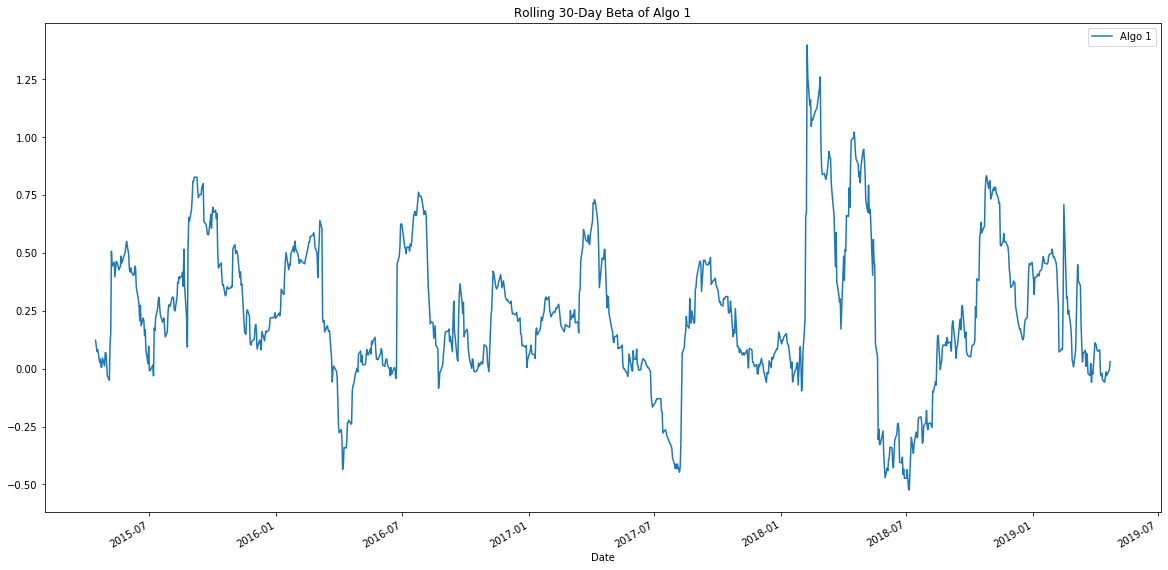

In [219]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
# Calculate 30-day rolling covariance of Algo 1 vs. S&P 500 and plot the data
rolling_algo_covariance = all_returns['Algo 1'].rolling(window=30).cov(all_returns['SP500'])

# Calculate 30-day rolling variance of S&P 500
rolling_variance = all_returns['Algo 1'].rolling(window=30).var()

# Calculate 30-day rolling beta of algo 1 and plot the data
rolling_algo_beta = rolling_algo_covariance / rolling_variance


ax = rolling_algo_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 1')

# Set the legend of the figure
ax.legend(["Algo 1"])

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [220]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values(inplace=True)
sharpe_ratios

Paulson   -0.483570
Tiger     -0.121060
Soros      0.356417
Algo 2     0.501364
Berk       0.621810
SP500      0.648267
Algo 1     1.378648
dtype: float64

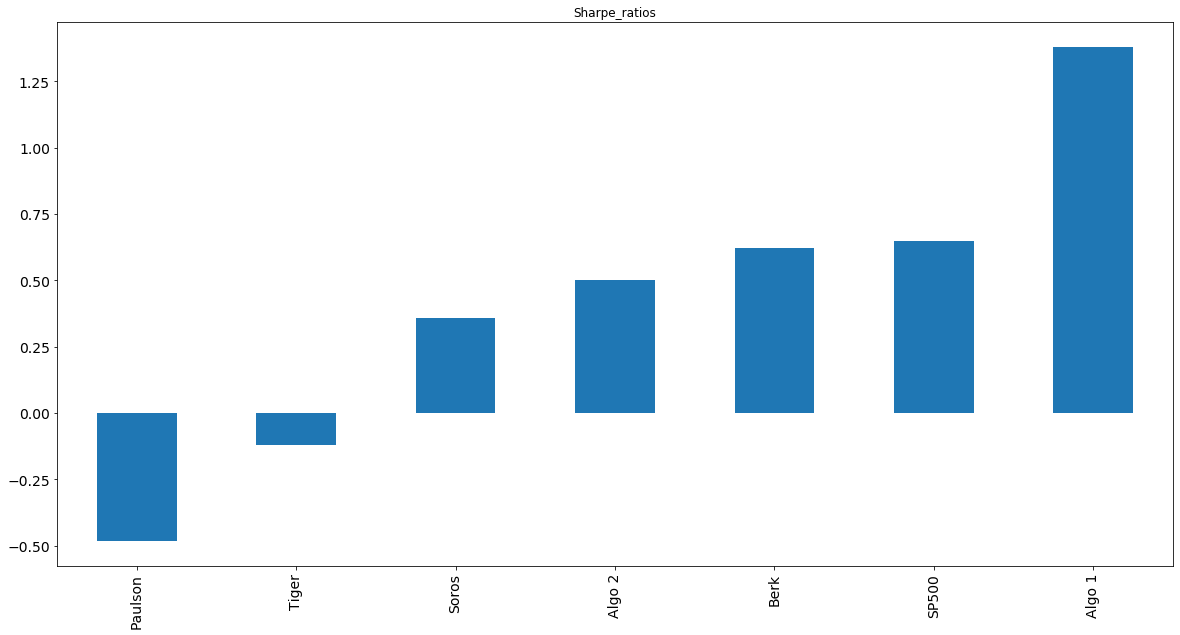

In [221]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe_ratios", fontsize=14, figsize=(20, 10))


On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [222]:
# Read the first stock
# YOUR CODE HERE

In [223]:
# Read the second stock
# YOUR CODE HERE

In [224]:
# Read the third stock
# YOUR CODE HERE

In [225]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
dream_close_csv = Path("Resources/dream_portfolio3.csv")
dream_df = pd.read_csv(dream_close_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
# dream_df.describe()
dream_df
dream_df.sort_index(inplace=True)

In [226]:
# Reset the index
# all ready done in read_csv
# YOUR CODE HERE
dream_df.columns = ["NVDA", "AMZN", "AMD", "CRM"]
dream_df

,NVDA,AMZN,AMD,CRM
Date,,,,
2015-01-02,20.13,308.52,2.69,59.24
2015-01-05,19.79,302.19,2.66,58.17
2015-01-06,19.19,295.29,2.63,57.20
2015-01-07,19.14,298.42,2.58,56.93
2015-01-08,19.86,300.46,2.61,58.59
...,...,...,...,...
2019-12-23,238.82,1793.00,45.46,163.74
2019-12-24,238.62,1789.21,46.54,163.25
2019-12-26,239.19,1868.77,46.63,164.51


In [227]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

In [228]:
# Drop Nulls
# YOUR CODE HERE
dream_df.isnull().sum()

NVDA    0
AMZN    0
AMD     0
CRM     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [229]:
# Calculate weighted portfolio returns
dream_returns = dream_df.pct_change()

# YOUR CODE HERE
weights = [1/4, 1/4, 1/4, 1/4]
dream_returns = dream_returns.dot(weights)
dream_returns.dropna()
dream_df.isnull().sum()
dream_returns.rename("Dream", inplace=True)
dream_returns.sort_index(inplace=True)
type(dream_returns)

pandas.core.series.Series

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [230]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
the_big_enchilada = pd.concat([all_returns2, dream_returns], axis="columns", join="inner")
the_big_enchilada

,Soros,Paulson,Tiger,Berk,Algo 1,Algo 2,SP500,Dream
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.016293
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.013306
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.005129
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.017339
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.004078
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.010515
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.010199
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001033


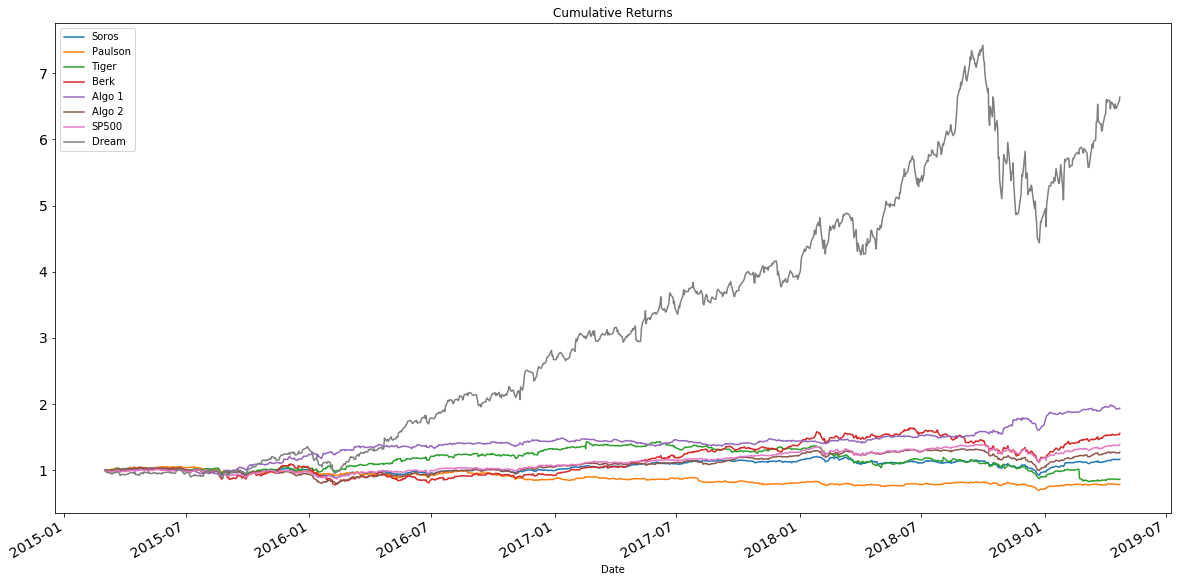

In [231]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
#Compare cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + the_big_enchilada).cumprod()
cumulative_returns.plot(kind="line", title="Cumulative Returns", fontsize=14, figsize=(20, 10))

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

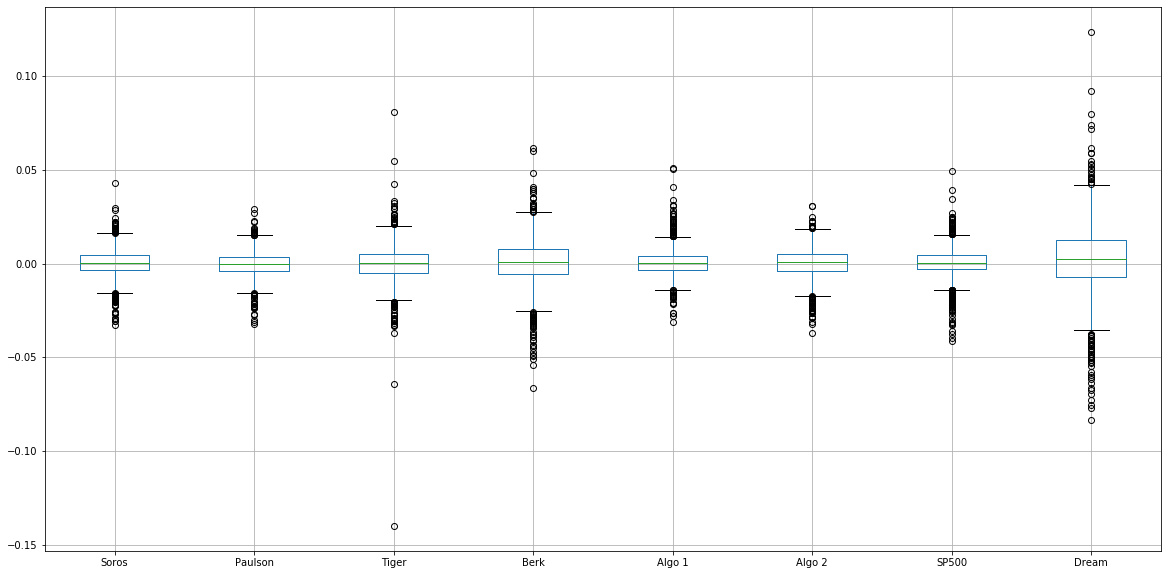

In [232]:
# Risk
# YOUR CODE HERE
the_big_enchilada.boxplot(column=['Soros','Paulson','Tiger','Berk','Algo 1','Algo 2','SP500', "Dream"], figsize=(20,10))

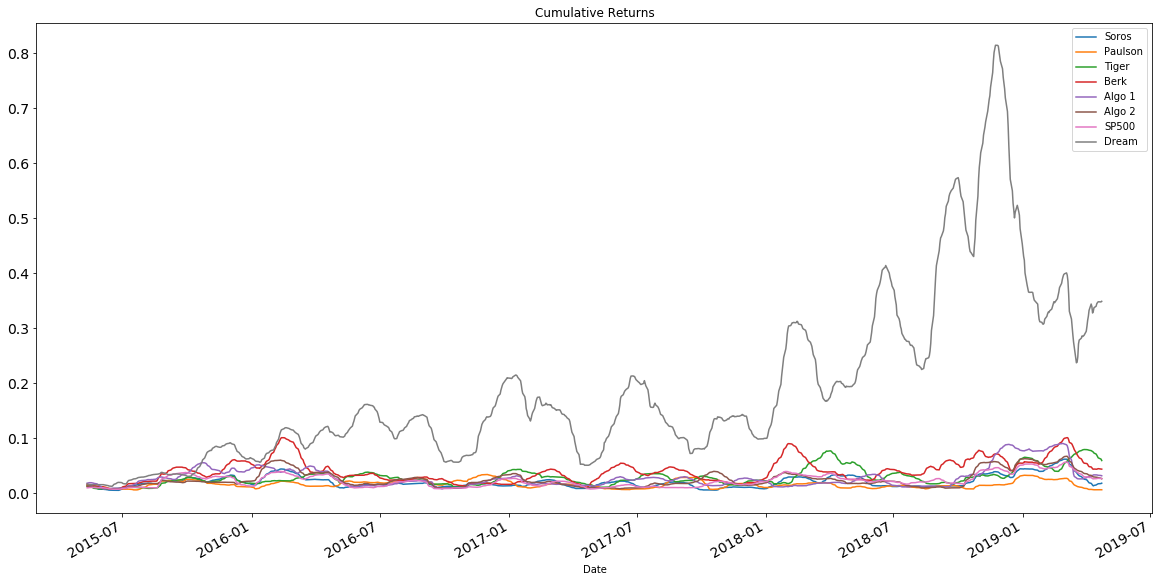

In [233]:
# Rolling
# YOUR CODE HERE
some_returns = cumulative_returns.rolling(window=50).std().plot(kind="line", title="Cumulative Returns", fontsize=14, figsize=(20, 10))

In [234]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (the_big_enchilada.mean() * 252) / (the_big_enchilada.std() * np.sqrt(252))
sharpe_ratios.sort_values(inplace=True)
sharpe_ratios

Paulson   -0.483570
Tiger     -0.121060
Soros      0.356417
Algo 2     0.501364
Berk       0.621810
SP500      0.648267
Algo 1     1.378648
Dream      1.608293
dtype: float64

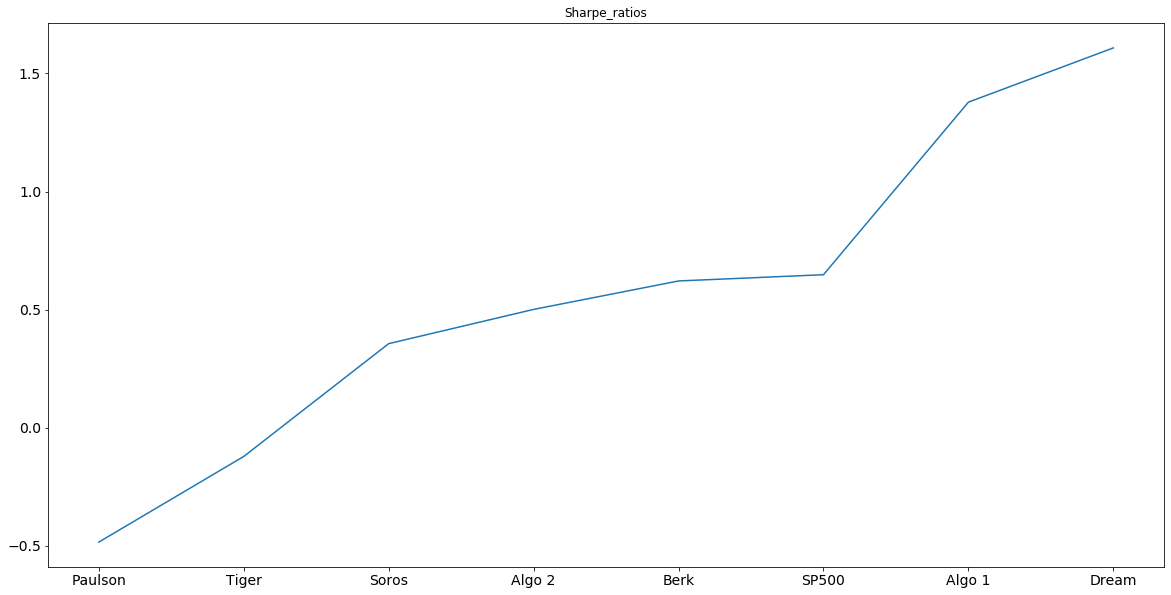

In [235]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="line", title="Sharpe_ratios", fontsize=14, figsize=(20, 10))

In [236]:
# Create a correlation analysis
# YOUR CODE HERE
correlation = the_big_enchilada.corr()
correlation

,Soros,Paulson,Tiger,Berk,Algo 1,Algo 2,SP500,Dream
Soros,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.622604
Paulson,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.459968
Tiger,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.387282
Berk,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.651518
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.189100
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,0.613450
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,0.662088
Dream,0.622604,0.459968,0.387282,0.651518,0.189100,0.613450,0.662088,1.000000


In [237]:
# Beta
# YOUR CODE HERE
dream_covariance = the_big_enchilada['Dream'].cov(all_returns['SP500'])
dream_variance = the_big_enchilada['Dream'].var()
beta_dream = dream_covariance / variance
beta_dream

1.939200411036191

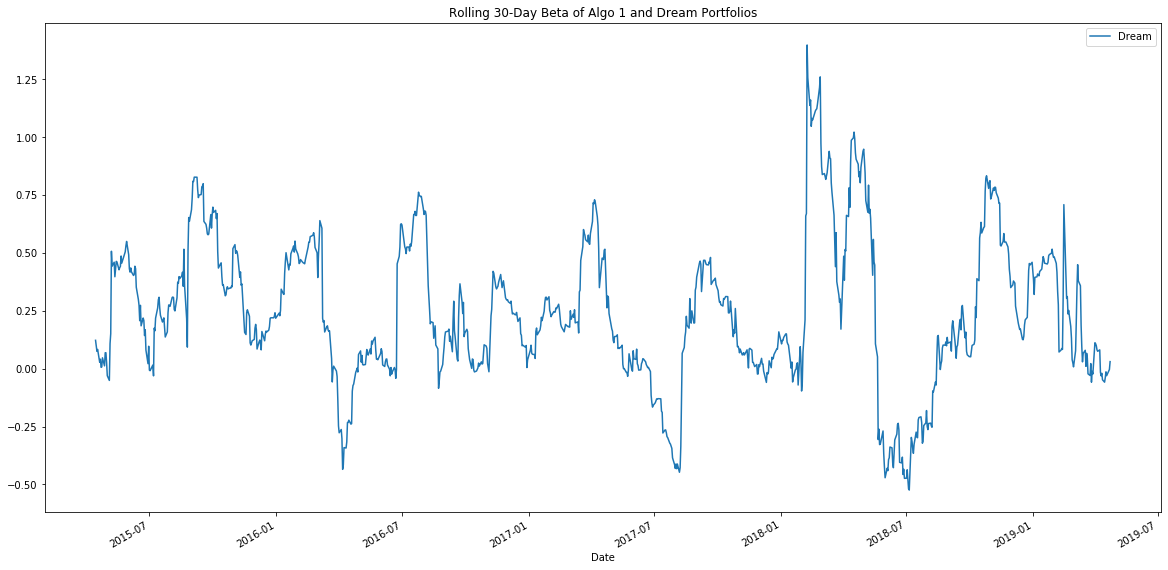

In [238]:
# Using your custom portfolio and one other of your choosing:
# The plotted beta.
# Set the figure of the chart and plot each data trend on the single figure
rolling_dream_covariance = the_big_enchilada['Dream'].rolling(window=30).cov(all_returns['SP500'])

# Calculate 30-day rolling variance of S&P 500
rolling_variance = the_big_enchilada['Dream'].rolling(window=30).var()

# Calculate 30-day rolling beta of algo 1 and plot the data
rolling_dream_beta = rolling_dream_covariance / rolling_variance

# code for layered graph
ax = rolling_algo_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 1 and Dream Portfolios')
# rolling_dream_beta.plot(ax=ax)

# Set the legend of the figure
# ax.legend(["Algo 1","Dream"])
ax.legend(["Dream"])